In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os as os
import cv2 as cv
import csv
from PIL import Image, ImageFont, ImageDraw, ImageFilter
from skimage.feature import canny
import pandas as pd

In [3]:
data_dir = './Images/'
categories = ['1rb_belakang','1rb_depan','2rb_belakang','2rb_depan','5rb_belakang','5rb_depan','10rb_belakang','10rb_depan','20rb_belakang','20rb_depan','50rb_belakang','50rb_depan','75rb_belakang','75rb_depan','100rb_belakang','100rb_depan']

for category in categories:
    path = os.path.join(data_dir,category)
    for image in os.listdir(path):
        images_array = cv.imread(os.path.join(path,image),cv.IMREAD_GRAYSCALE) #gabungin path dan image
        
#         images_array = edgeDetect(images_array)
    break

In [4]:
print(images_array)

[[219 217 216 ... 214 214 214]
 [219 218 218 ... 214 214 214]
 [218 219 219 ... 215 214 214]
 ...
 [139 138 135 ... 202 202 200]
 [144 143 130 ... 200 203 201]
 [142 144 132 ... 199 203 203]]


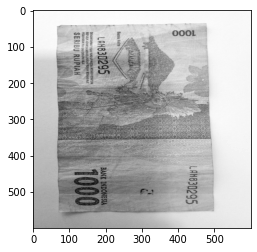

In [5]:
img_size = 600
img_resize = cv.resize(images_array,(img_size,img_size))

plt.imshow(img_resize, cmap = "gray")
plt.show()

In [73]:
training_data = []

data_dir = './Images/'
# categories = ['1rb_belakang','1rb_depan','2rb_belakang','2rb_depan','5rb_belakang','5rb_depan','10rb_belakang','10rb_depan','20rb_belakang','20rb_depan','50rb_belakang','50rb_depan','75rb_belakang','75rb_depan','100rb_belakang','100rb_depan']
categories = ['1rb_belakang','1rb_depan']

def create_training_data():
    for category in categories:
        path = os.path.join(data_dir,category)
    
        class_num = category
    
        for image in os.listdir(path):
            try:
                images_array = cv.imread(os.path.join(path,image),cv.IMREAD_GRAYSCALE) #gabungin path dan image
                new_array = cv.resize(images_array,(img_size,img_size)) #resize
                    
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
        
create_training_data()

In [74]:
print(len(training_data))

24


In [75]:
dataset = pd.DataFrame.from_dict(training_data)
dataset

,0,1
0,"[[127, 129, 125, 125, 126, 122, 124, 131, 128,...",1rb_belakang
1,"[[136, 135, 124, 133, 134, 132, 132, 125, 127,...",1rb_belakang
2,"[[140, 134, 129, 126, 131, 125, 133, 131, 134,...",1rb_belakang
3,"[[126, 114, 125, 126, 129, 120, 114, 129, 130,...",1rb_belakang
4,"[[131, 128, 130, 132, 130, 123, 121, 129, 129,...",1rb_belakang
5,"[[131, 126, 126, 127, 129, 119, 130, 128, 126,...",1rb_belakang
6,"[[136, 124, 127, 129, 130, 129, 127, 125, 126,...",1rb_belakang
7,"[[140, 138, 127, 135, 122, 128, 131, 133, 128,...",1rb_belakang
8,"[[115, 123, 121, 125, 124, 128, 126, 124, 123,...",1rb_belakang
9,"[[130, 125, 117, 115, 116, 114, 119, 123, 122,...",1rb_belakang


In [20]:
for sample in training_data[:10]:
    print(sample[1])

1rb_belakang
1rb_belakang
1rb_belakang
1rb_belakang
1rb_belakang
1rb_belakang
1rb_belakang
1rb_belakang
1rb_belakang
1rb_belakang


In [21]:
X = []
y = []

In [22]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size,img_size, 1)

In [23]:
import pickle

# pickle_out = open("X.pickle","wb")
# pickle.dump(X,pickle_out)
# pickle_out.close()

# pickle_out = open("y.pickle","wb")
# pickle.dump(y,pickle_out)
# pickle_out.close()

# file = open("dataset.pickle","wb")
# pickle.dump((X,y),file)
# file.close()

# df = pd.DataFrame(X,y)
# print(df)



In [24]:
with open('dataset.pickle','rb') as pickle_file:
    pixels, labels = pickle.load(pickle_file)

In [26]:
print(pixels[0], labels[0])

[[[127]
  [129]
  [125]
  ...
  [137]
  [141]
  [145]]

 [[128]
  [133]
  [123]
  ...
  [141]
  [141]
  [146]]

 [[124]
  [125]
  [133]
  ...
  [147]
  [137]
  [135]]

 ...

 [[139]
  [132]
  [132]
  ...
  [133]
  [129]
  [129]]

 [[130]
  [129]
  [133]
  ...
  [134]
  [132]
  [122]]

 [[131]
  [138]
  [135]
  ...
  [129]
  [131]
  [131]]] 1rb_belakang
